[iter:0] delta_x_inf_norm:0.50024975
[iter:5000] delta_x_inf_norm:0.00010004012083270064
[iter:10000] delta_x_inf_norm:5.0670943158193094e-05
[iter:15000] delta_x_inf_norm:3.4097281857659034e-05
[iter:20000] delta_x_inf_norm:2.576865513376214e-05
[iter:25000] delta_x_inf_norm:2.0749014827736723e-05
[iter:30000] delta_x_inf_norm:1.739005467593646e-05
[iter:35000] delta_x_inf_norm:1.4982356134729535e-05
[iter:40000] delta_x_inf_norm:1.3170581634247558e-05
[iter:45000] delta_x_inf_norm:1.1757222798447486e-05
[iter:50000] delta_x_inf_norm:1.0623453301938923e-05
[iter:53247] inf norm 9.999691233497643e-06 lower than tol 1e-05, stop!
[iter:0] delta_x_inf_norm:0.5002495002501252
[iter:5000] delta_x_inf_norm:5.100897899651402e-05
[iter:10000] delta_x_inf_norm:2.5783038905879962e-05
[iter:15000] delta_x_inf_norm:1.7322642241190955e-05
[iter:20000] delta_x_inf_norm:1.3068887579847921e-05
[iter:25000] delta_x_inf_norm:1.0503931054173243e-05
[iter:26288] inf norm 9.999767194512899e-06 lower than t

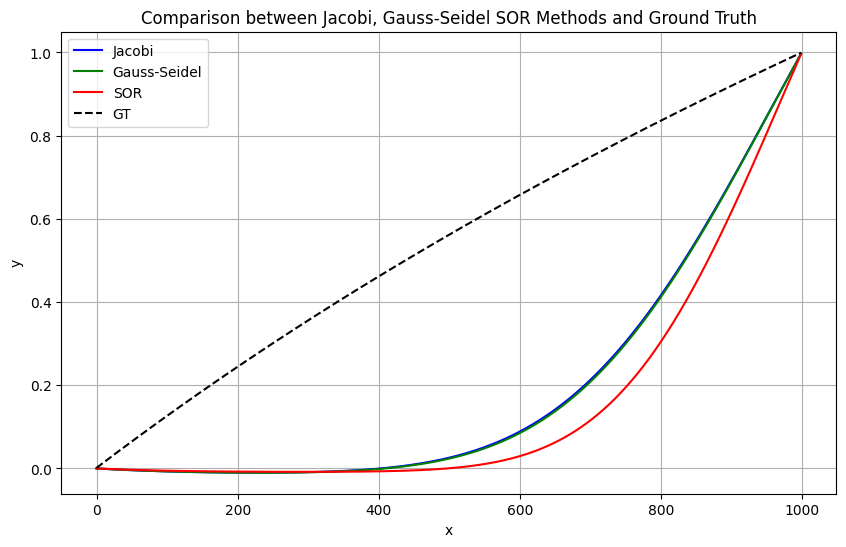

In [46]:
import numpy as np
def plot(x_jacobi,x_gs, x_sor,x_gt):
    import numpy as np
    import matplotlib.pyplot as plt

    # Assuming you have already computed x_jacobi, x_gs, and x_sor

    # Define the number of iterations
    iterations = np.arange(len(x_jacobi))

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(iterations, x_jacobi, label='Jacobi', color='blue')
    plt.plot(iterations, x_gs, label='Gauss-Seidel', color='green')
    plt.plot(iterations, x_sor, label='SOR', color='red')
    plt.plot(iterations, x_gt, label='GT',linestyle='dashed', color='black')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Comparison between Jacobi, Gauss-Seidel SOR Methods and Ground Truth')
    plt.legend()
    plt.grid(True)
    plt.show()

def Jacobi(A,b,x0,tol=1e-6,max_iter=200000):
    n = A.shape[0]
    x = x0.copy()
    while True:
        x_old = x.copy()
        for i in range(n):
            x[i] = (b[i] - np.dot(A[i,:i], x_old[:i]) - np.dot(A[i,i+1:], x_old[i+1:])) / A[i,i]
        if max_iter%1000 == 0:
            print(np.linalg.norm(x - x_old,ord=np.inf))
        if np.linalg.norm(x - x_old,ord=np.inf) < tol:
            return x
        if max_iter == 0:
            print(f"reach max_iter:{max_iter}, stop!")
            return x
        max_iter -= 1

def Jacobi_sparse(A,b,x0,tol=1e-5,max_iter=200000):
    n = A.shape[0]
    x = x0.copy()
    for iter in range(max_iter):
        x_old = x.copy()
        for i in range(n):
            ans = b[i]
            if i>0:
                ans -= A[i,0]*x_old[i-1]
            if i<n-1:
                ans -= A[i,2]*x_old[i+1]
            x[i] = ans / A[i,1]
        delta_x_inf_norm = np.linalg.norm(x - x_old,ord=np.inf)
        if iter%5000 == 0:
            print(f"[iter:{iter}] delta_x_inf_norm:{delta_x_inf_norm}")
        if np.linalg.norm(x - x_old,ord=np.inf) < tol:
            print(f"[iter:{iter}] inf norm {delta_x_inf_norm} lower than tol {tol}, stop!")
            return x

    print(f"reach max_iter:{max_iter}, stop!")
    return x

def GS_sparse(A,b,x0,tol=1e-5,max_iter=200000):
    n = A.shape[0]
    x = x0.copy()
    for iter in range(max_iter):
        x_old = x.copy()
        for i in range(n):
            ans = b[i]
            if i>0:
                ans -= A[i,0]*x[i-1]
            if i<n-1:
                ans -= A[i,2]*x[i+1]
            x[i] = ans / A[i,1]
        delta_x_inf_norm = np.linalg.norm(x - x_old,ord=np.inf)
        if iter%5000 == 0:
            print(f"[iter:{iter}] delta_x_inf_norm:{delta_x_inf_norm}")
        if np.linalg.norm(x - x_old,ord=np.inf) < tol:
            print(f"[iter:{iter}] inf norm {delta_x_inf_norm} lower than tol {tol}, stop!")
            return x

    print(f"reach max_iter:{max_iter}, stop!")
    return x

def SOR_sparse(A,b,x0,tol=1e-5,max_iter=200000, omega=0.8):
    n = A.shape[0]
    x = x0.copy()
    for iter in range(max_iter):
        x_old = x.copy()
        for i in range(n):
            ans = b[i]
            if i>0:
                ans -= A[i,0]*x[i-1]
            if i<n-1:
                ans -= A[i,2]*x[i+1]
            x[i] = (1-omega)*x_old[i] + omega * ans / A[i,1]
        delta_x_inf_norm = np.linalg.norm(x - x_old,ord=np.inf)
        if iter%5000 == 0:
            print(f"[iter:{iter}] delta_x_inf_norm:{delta_x_inf_norm}")
        if np.linalg.norm(x - x_old,ord=np.inf) < tol:
            print(f"[iter:{iter}] inf norm {delta_x_inf_norm} lower than tol {tol}, stop!")
            return x

    print(f"reach max_iter:{max_iter}, stop!")
    return x

def make_A(n,eps, h):
    h = 1/n
    A = np.zeros((n,n))
    for i in range(n):
        A[i,i] = -2*eps
        if i>0:
            A[i,i-1] = eps-h/2
        if i<n-1:
            A[i,i+1] = eps+h/2
    return A

def make_sparse_A(n,eps, h):
    h = 1/n
    A = np.zeros((n,3))
    for i in range(n):
        A[i,1] = -2*eps
        if i>0:
            A[i,0] = eps-h/2
        if i<n-1:
            A[i,2] = eps+h/2
    return A

def make_b(n,eps,a, h):
    b = np.zeros(n)
    for i in range(n):
        b[i] = a*h**2
    b[n-1] = a*h**2 - eps - h/2

    return b

n=1000
a = 0.5
eps = 1
tol = 1e-5
h = 1/n
ans = np.arange(1/n,1,1/n)
x_gt = (1 - a)/(1-np.exp(-1/eps))*(1-np.exp(-ans/eps)) + a*ans
A = make_A(n-1, eps, h)
A_sparse = make_sparse_A(n-1,eps,h)
# print(A)
b = make_b(n-1,eps,a, h)
x0 = np.zeros(n-1)
x_jacobi = Jacobi_sparse(A_sparse,b,x0,tol)
x_gs = GS_sparse(A_sparse,b,x0,tol)
x_sor = SOR_sparse(A_sparse,b,x0,tol)
plot(x_jacobi,x_gs,x_sor,x_gt)

===================== n: 10 =====================
[iter:0] delta_x_inf_norm:0.5225
[iter:174] inf norm 9.595781573112916e-06 lower than tol 1e-05, stop!
[iter:0] delta_x_inf_norm:0.5202686889333961
[iter:89] inf norm 9.897924960755589e-06 lower than tol 1e-05, stop!
[iter:0] delta_x_inf_norm:0.41678621803233584
[iter:128] inf norm 9.86349937343034e-06 lower than tol 1e-05, stop!


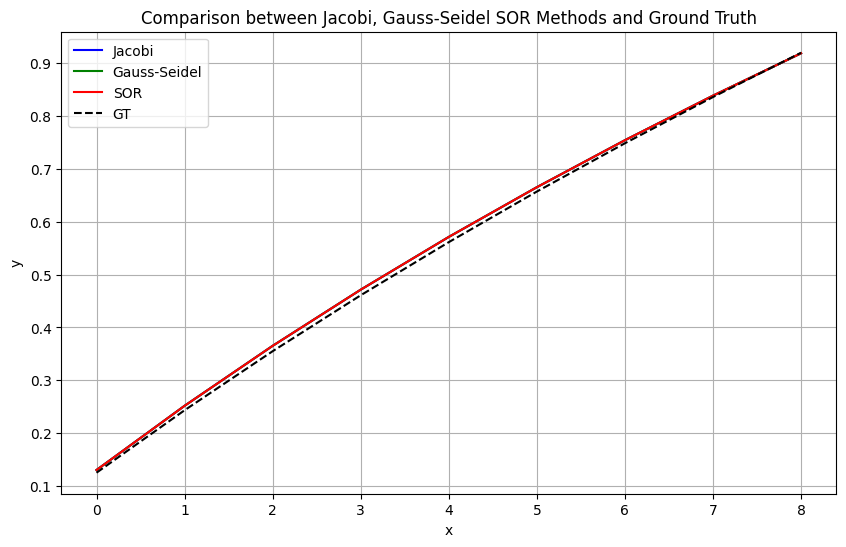

===================== n: 20 =====================
[iter:0] delta_x_inf_norm:0.511875
[iter:597] inf norm 9.766890914308934e-06 lower than tol 1e-05, stop!
[iter:0] delta_x_inf_norm:0.5112820526816498
[iter:302] inf norm 9.94433080186985e-06 lower than tol 1e-05, stop!
[iter:0] delta_x_inf_norm:0.4091810344963214
[iter:428] inf norm 9.896246683460674e-06 lower than tol 1e-05, stop!


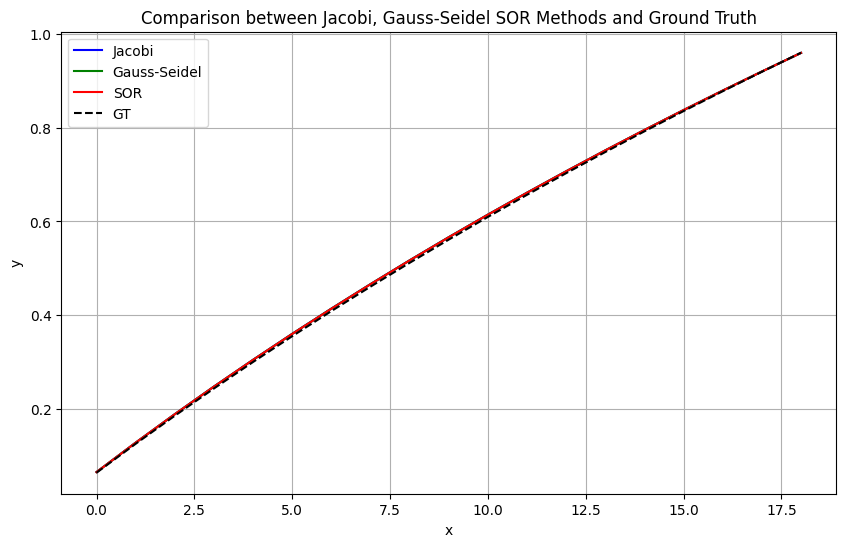

===================== n: 50 =====================
[iter:0] delta_x_inf_norm:0.5049
[iter:2838] inf norm 9.996493248953797e-06 lower than tol 1e-05, stop!
[iter:0] delta_x_inf_norm:0.5048020202020203
[iter:1424] inf norm 9.962449660450012e-06 lower than tol 1e-05, stop!
[iter:0] delta_x_inf_norm:0.4038675675675676
[iter:1979] inf norm 9.981903339451037e-06 lower than tol 1e-05, stop!


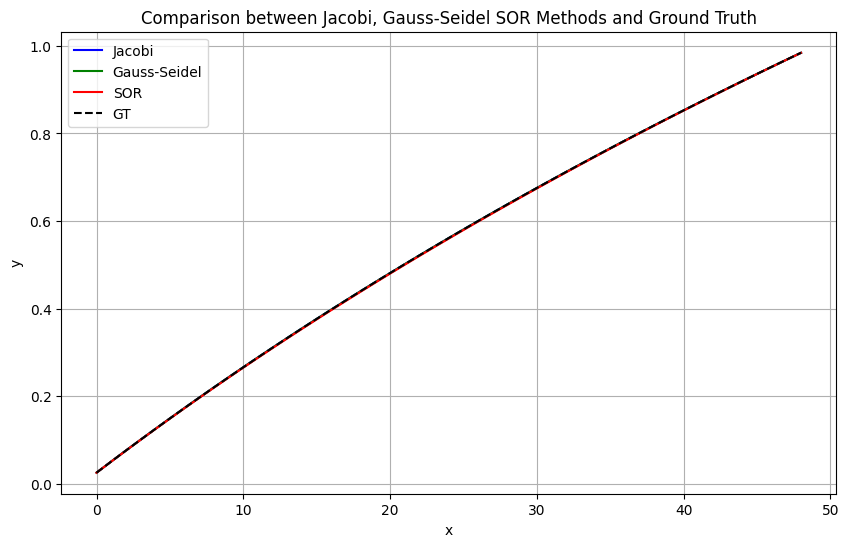

===================== n: 100 =====================
[iter:0] delta_x_inf_norm:0.502475
[iter:5000] delta_x_inf_norm:6.254125553262213e-05
[iter:8621] inf norm 9.998321526705212e-06 lower than tol 1e-05, stop!
[iter:0] delta_x_inf_norm:0.5024502512562814
[iter:4299] inf norm 9.99228502063243e-06 lower than tol 1e-05, stop!
[iter:0] delta_x_inf_norm:0.40196677852348994
[iter:5000] delta_x_inf_norm:1.754362443168178e-05
[iter:5833] inf norm 9.9986663547047e-06 lower than tol 1e-05, stop!


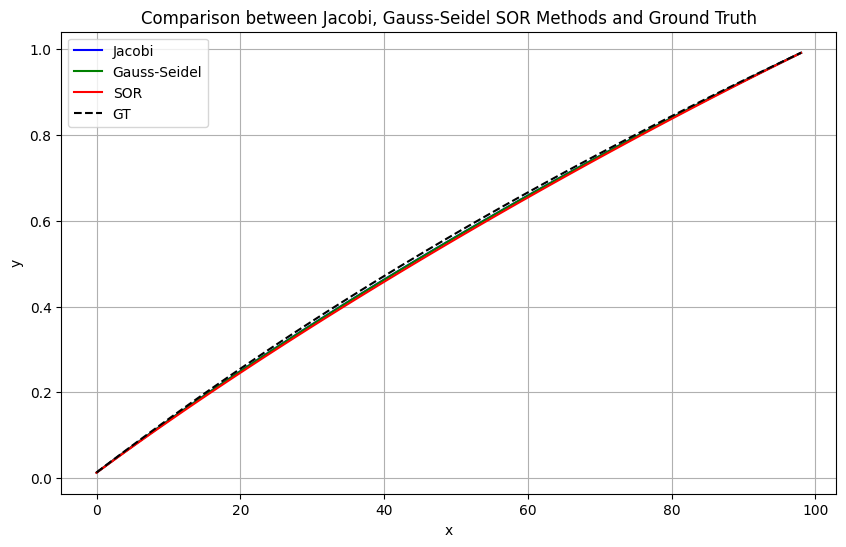

===================== n: 200 =====================
[iter:0] delta_x_inf_norm:0.50124375
[iter:5000] delta_x_inf_norm:0.00011087769498646649
[iter:10000] delta_x_inf_norm:5.4795656453665575e-05
[iter:15000] delta_x_inf_norm:2.936607622527898e-05
[iter:20000] delta_x_inf_norm:1.562853261904973e-05
[iter:23532] inf norm 9.99891265274222e-06 lower than tol 1e-05, stop!
[iter:0] delta_x_inf_norm:0.5012375313283208
[iter:5000] delta_x_inf_norm:5.325045462722944e-05
[iter:10000] delta_x_inf_norm:1.5208221221640894e-05
[iter:11658] inf norm 9.999869089782898e-06 lower than tol 1e-05, stop!
[iter:0] delta_x_inf_norm:0.40099168060200674
[iter:5000] delta_x_inf_norm:5.4611499869516855e-05
[iter:10000] delta_x_inf_norm:2.3352583474967048e-05
[iter:15000] delta_x_inf_norm:1.0089560331605352e-05
[iter:15053] inf norm 9.999858375742132e-06 lower than tol 1e-05, stop!


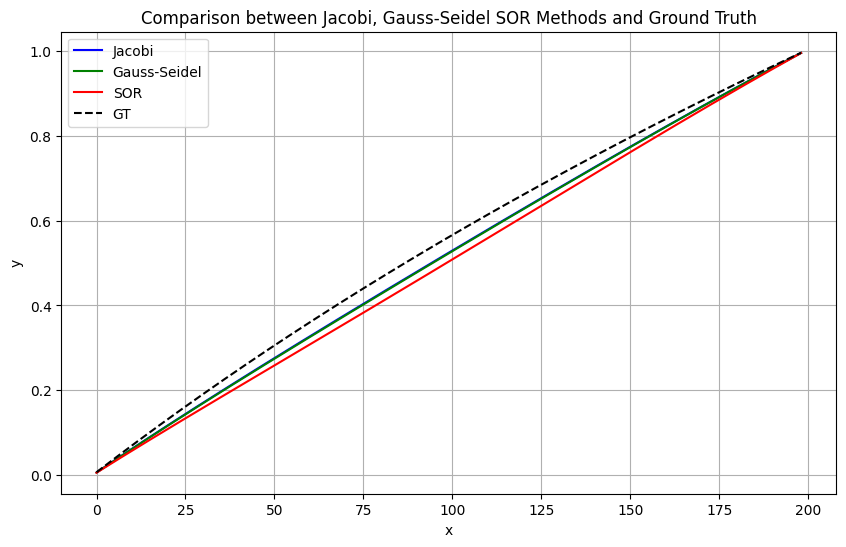

===================== n: 500 =====================
[iter:0] delta_x_inf_norm:0.500499
[iter:5000] delta_x_inf_norm:0.0001030725738420668
[iter:10000] delta_x_inf_norm:5.2683902659445e-05
[iter:15000] delta_x_inf_norm:3.5668524013376945e-05
[iter:20000] delta_x_inf_norm:2.7082516160126247e-05
[iter:25000] delta_x_inf_norm:2.1899174561079704e-05
[iter:30000] delta_x_inf_norm:1.843019451225336e-05
[iter:35000] delta_x_inf_norm:1.5939652939112037e-05
[iter:40000] delta_x_inf_norm:1.4047958999896526e-05
[iter:45000] delta_x_inf_norm:1.2536911889016178e-05
[iter:50000] delta_x_inf_norm:1.1273482023899106e-05
[iter:55000] delta_x_inf_norm:1.0179427280321285e-05
[iter:55885] inf norm 9.999703837526575e-06 lower than tol 1e-05, stop!
[iter:0] delta_x_inf_norm:0.500498002002002
[iter:5000] delta_x_inf_norm:5.254195109360982e-05
[iter:10000] delta_x_inf_norm:2.662119220908643e-05
[iter:15000] delta_x_inf_norm:1.792884317713961e-05
[iter:20000] delta_x_inf_norm:1.3581624690284233e-05
[iter:25000] 

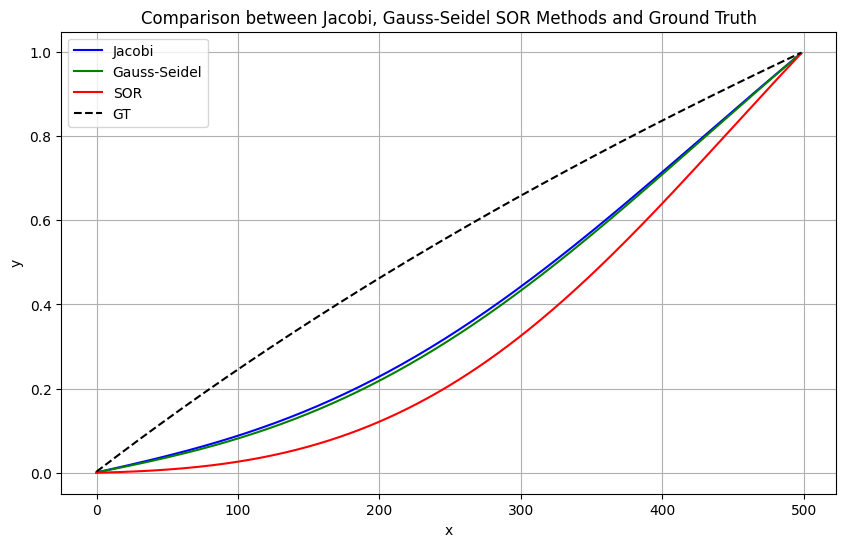

In [47]:
for n in [10,20,50,100,200,500]:
    print(f"===================== n: {n} =====================")
    a = 0.5
    eps = 1
    tol = 1e-5
    h = 1/n
    ans = np.arange(1/n,1,1/n)
    x_gt = (1 - a)/(1-np.exp(-1/eps))*(1-np.exp(-ans/eps)) + a*ans
    A = make_A(n-1, eps, h)
    A_sparse = make_sparse_A(n-1,eps,h)
    # print(A)
    b = make_b(n-1,eps,a, h)
    x0 = np.zeros(n-1)
    x_jacobi = Jacobi_sparse(A_sparse,b,x0,tol)
    x_gs = GS_sparse(A_sparse,b,x0,tol)
    x_sor = SOR_sparse(A_sparse,b,x0,tol)
    plot(x_jacobi,x_gs,x_sor,x_gt)
    

===================== eps: 0.1 =====================
[iter:0] delta_x_inf_norm:0.5024975
[iter:5000] delta_x_inf_norm:0.0001322043658924521
[iter:10000] delta_x_inf_norm:7.375395859965383e-05
[iter:15000] delta_x_inf_norm:5.3132526102117605e-05
[iter:20000] delta_x_inf_norm:4.238151860130879e-05
[iter:25000] delta_x_inf_norm:3.5700802638982676e-05
[iter:30000] delta_x_inf_norm:3.110883311946422e-05
[iter:35000] delta_x_inf_norm:2.773921897308851e-05
[iter:40000] delta_x_inf_norm:2.5148192892510135e-05
[iter:45000] delta_x_inf_norm:2.3086874056776896e-05
[iter:50000] delta_x_inf_norm:2.1402881023036002e-05
[iter:55000] delta_x_inf_norm:1.9997576072627865e-05
[iter:60000] delta_x_inf_norm:1.880470504961318e-05
[iter:65000] delta_x_inf_norm:1.7777932683371578e-05
[iter:70000] delta_x_inf_norm:1.6883887909768802e-05
[iter:75000] delta_x_inf_norm:1.6097566744532887e-05
[iter:80000] delta_x_inf_norm:1.540023114965372e-05
[iter:85000] delta_x_inf_norm:1.4777232724860756e-05
[iter:90000] delta

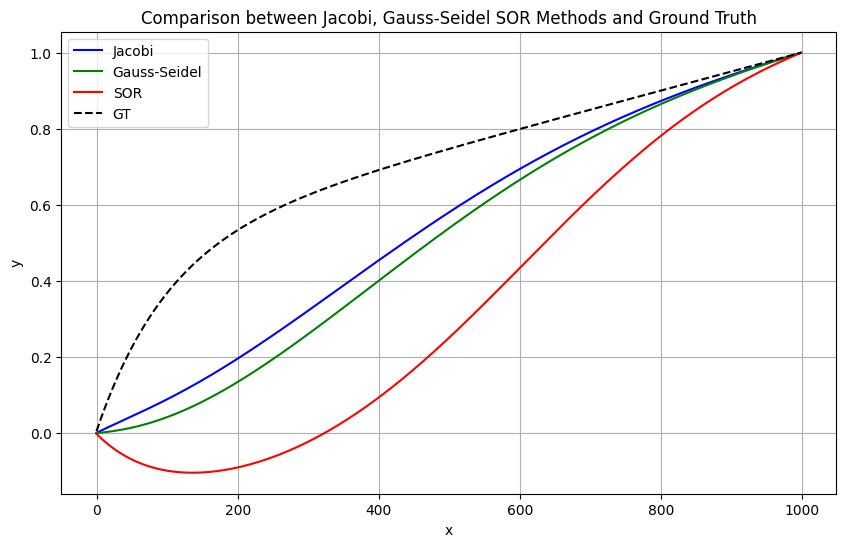

===================== eps: 0.01 =====================
[iter:0] delta_x_inf_norm:0.524975
[iter:5000] delta_x_inf_norm:0.0005730056657844429
[iter:10000] delta_x_inf_norm:0.00039422158157950693
[iter:15000] delta_x_inf_norm:0.0003175601470990913
[iter:20000] delta_x_inf_norm:0.0002464759324377064
[iter:25000] delta_x_inf_norm:3.586213771394897e-05
[iter:27057] inf norm 9.999690970208253e-06 lower than tol 1e-05, stop!
[iter:0] delta_x_inf_norm:0.5249523832221163
[iter:5000] delta_x_inf_norm:0.00039307210685962657
[iter:10000] delta_x_inf_norm:0.00026520530014256805
[iter:14005] inf norm 9.987245379483589e-06 lower than tol 1e-05, stop!
[iter:0] delta_x_inf_norm:0.41996774297707457
[iter:5000] delta_x_inf_norm:0.0003242954137182008
[iter:10000] delta_x_inf_norm:0.00022122597589394055
[iter:15000] delta_x_inf_norm:0.0001720993447680702
[iter:20000] delta_x_inf_norm:1.2869401015247472e-05
[iter:20301] inf norm 9.994642540700482e-06 lower than tol 1e-05, stop!


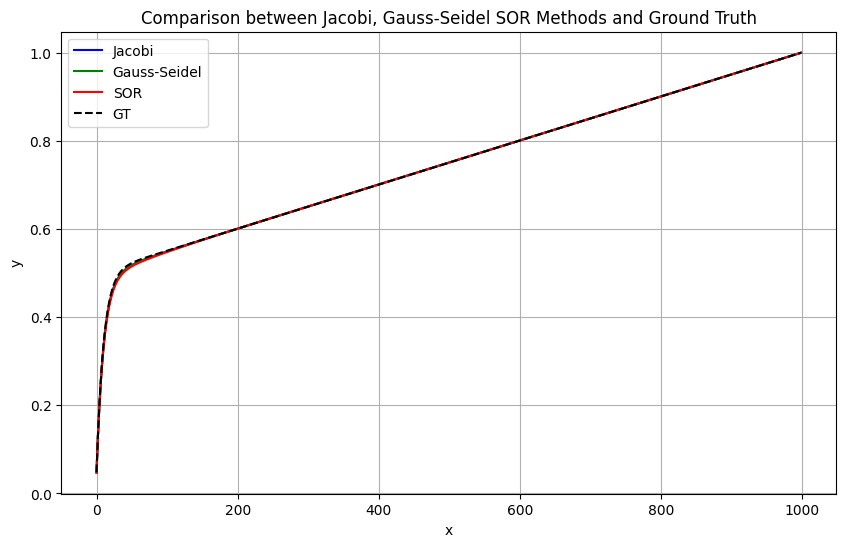

===================== eps: 0.001 =====================
[iter:0] delta_x_inf_norm:0.7497499999999999
[iter:2297] inf norm 9.786602594263893e-06 lower than tol 1e-05, stop!
[iter:0] delta_x_inf_norm:0.7496667778519012
[iter:1647] inf norm 9.776636966274399e-06 lower than tol 1e-05, stop!
[iter:0] delta_x_inf_norm:0.5997500625469102
[iter:2231] inf norm 9.634348056897224e-06 lower than tol 1e-05, stop!


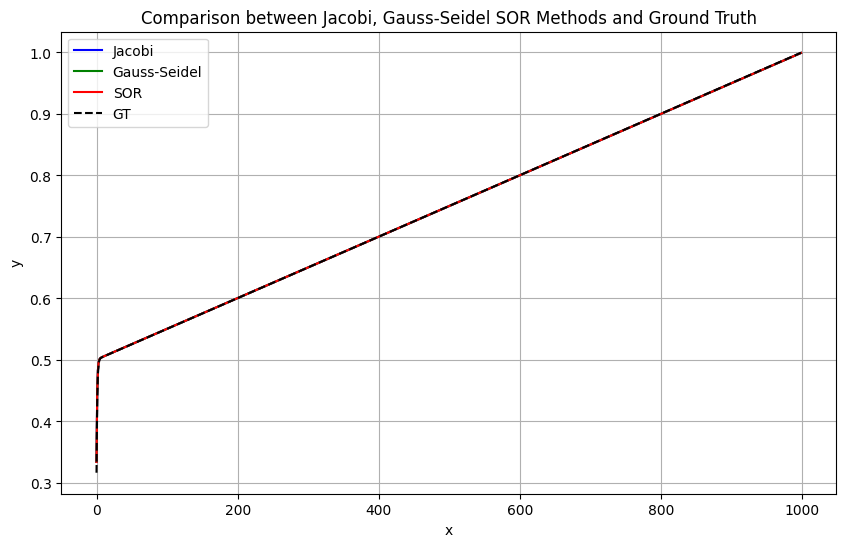

In [48]:
for eps in [1e-1, 1e-2, 1e-3]:
    print(f"===================== eps: {eps} =====================")
    tol = 1e-5
    n = 1000
    a = 0.5
    h = 1/n
    ans = np.arange(1/n,1,1/n)
    x_gt = (1 - a)/(1-np.exp(-1/eps))*(1-np.exp(-ans/eps)) + a*ans
    A = make_A(n-1, eps, h)
    A_sparse = make_sparse_A(n-1,eps,h)
    # print(A)
    b = make_b(n-1,eps,a, h)
    x0 = np.zeros(n-1)
    x_jacobi = Jacobi_sparse(A_sparse,b,x0,tol)
    x_gs = GS_sparse(A_sparse,b,x0,tol)
    x_sor = SOR_sparse(A_sparse,b,x0,tol)
    plot(x_jacobi,x_gs, x_sor,x_gt)